In [1]:
%matplotlib inline

from funcy import pluck, walk_values
import matplotlib.pyplot as plt
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import LatentDirichletAllocation

from load import group_by, comments_grouped_by
None

101289



Bad key "axes.spines.right" on line 210 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.flierprops.linewidth" on line 321 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "contour.corner_mask" on line 306 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.vertical" on line 339 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get

In [3]:
comments_by_subreddit = comments_grouped_by('subreddit')

In [4]:
pool = lambda comments: ' '.join(pluck('body', comments))

subreddit_comments = {s: walk_values(pool, group_by(comments, 'author')) 
                          for s, comments in comments_by_subreddit.iteritems()
                     }

In [5]:
def clean_document(d):
    return ' '.join(filter(filter_word, word_tokenize(d)))

def filter_word(w):
    if len(w) > 20:
        return False
    if 'http:' in w:
        return False
    return True
    
documents = []
labels = []
for subreddit, user_comments in subreddit_comments.items():
    documents += user_comments.values() #map(clean_document, user_comments.values())
    labels += [subreddit] * len(user_comments.values())

label_set = set(labels)
label_index = { label: i for i, label in enumerate(label_set) }
index_label  = { i: label for i, label in enumerate(label_set) }

In [6]:
vectorizer = CountVectorizer(min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)
Y = np.array([label_index[l] for l in labels])

In [7]:
classifier = DecisionTreeClassifier()
# classifier.fit(X.toarray(), Y)
np.mean(cross_val_score(classifier, X.toarray(), Y, cv=10))

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.58594928285617187

In [58]:
scores = {}
for topics in range(5, 75, 5):
    lda = LatentDirichletAllocation(n_topics=topics)
    X_new = lda.fit_transform(X.toarray())
    clf = DecisionTreeClassifier()
    scores[topics] = np.mean(cross_val_score(classifier2, X_new, Y, cv=10))
scores

{5: 0.55656680944208237,
 10: 0.67284982062490473,
 15: 0.65031016924198537,
 20: 0.68537952082833142,
 25: 0.60795378601049421,
 30: 0.67305559378450908,
 35: 0.66998018242018231,
 40: 0.63689962241220621,
 45: 0.67131844803018303,
 50: 0.66936194295760165,
 55: 0.68318505286896714,
 60: 0.68151071674198471,
 65: 0.68055414232591693,
 70: 0.66556159998672315}

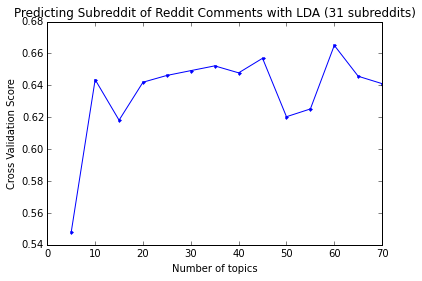

In [55]:
sorted_scores = sorted(scores.items(), key = lambda s:s[0])
plt.plot(pluck(0, sorted_scores), pluck(1, sorted_scores), '.-')
plt.title('Predicting Subreddit of Reddit Comments with LDA (%s subreddits)' % len(set(Y)))
plt.xlabel('Number of topics')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
# new ideas - train separate lda on each subreddit, then merge topics and see where the most density is

# hellinger distance




In [60]:
len(X.toarray())



1666